# Линейная регрессия

In [26]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

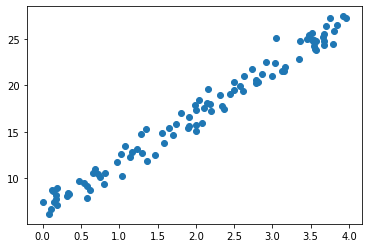

In [19]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

# Пакетный и стохастический градиентный спуск


Линейная регрессия, приближающая некоторую зависимость:  
<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... + \beta_n x_{n,i}$ (1)</p>
Простейший вариант:  

<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{i}$</p>   


**Задача: подобрать коэффициенты $\beta$ таким образом, чтобы наиболее точно апроксимировать (приблизить) моделируемую зависимость.**
Для реализации градиентного спуска необходимо итеративно вычислять градиент функции ошибки относительно параметров $\beta$. Другими словами, мы вычисляем как сильно изменится функция ошибки, если мы немного изменим каждый из коэффициентов $\beta$. Это называется частными производными. Данное действие похоже на то, если бы мы спросили себя насколько сильно я спущусь с горы, если немного пройду на восток? А если на юг? А теперь представим, что у нас множество таких измерений [1]. 

Чтобы вычислить коэффициенты модели, необходимо ввести функцию ошибки, которую необходимо минимизировать.  
Обозначим $e_i$ как ошибку модели на точке с номером $i$, таким образом:    
<p style="text-align: center;">$e_i = y_i - \hat{y_i}$</p> 

Где $\hat{y_i}$ - моделируемый результат, $y_i$ - известный результат.    
Объявим функцию ошибки:    

<p style="text-align: center;">$Loss(\beta)= \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (y_i - \hat{y_i})^2 = \sum_{i=1}^m (y_i - X\beta)^2 $</p>

Градиент функции ошибки (вектор частных производных):  

<p style="text-align: center;">$\frac{\partial}{\partial\beta_{j}}Loss(\beta)=\frac{2}{m}\sum_{i=1}^m(y^{(i)}-x^{(i)}\beta)(-x_{j}^{(i)})$</p>

Перепишем в матричной форме:
<p style="text-align: center;">$\frac{\partial}{\partial\beta}Loss(\beta)=\frac{2}{m}(-X)^{T}(Y-X\beta)$</p>

После того как в рамках каждой итерации мы вычислили градиент, который показывает направление роста функции, нам необходимо двигаться в направлении антиградиента, для того чтобы стремиться к минимуму функции ошибок:

<p style="text-align: center;">$\beta^{next}=\beta-\eta\nabla_{\beta}Loss(\beta)$</p>

Где $\eta$ - показатель обучения (learning rate)












 

In [89]:
# Реализация в коде
from sklearn.base import BaseEstimator
import numpy as np

class BatchGradientRegressor(BaseEstimator):
    ''' Пакетный градиентный спуск
    '''
    def __init__(self, learning_rate = 0.01, epochs = 10, verbose = False): 
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.verbose = verbose
        self.epsilon = 0.01
    
    def __calc_loss(self, X, y, beta):
        lp = y - X.dot(beta)
        return lp.T.dot(lp)
        
    def fit(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
       
        beta = np.ones((n, 1)) # Инициализируем веса
        for ep in range(0, self.epochs):
            gradient = (2 / m) * (np.negative(X).T.dot(y - X.dot(beta)))
            beta = beta - self.learning_rate * gradient
            
            # Оцениваем качество
            loss = self.__calc_loss(X, y, beta)
            
            if (self.verbose):
                print("Loss:", loss)
        
        self.coeffs_ = beta

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coeffs_)

При разработке моделей машинного обучения принято соблюдать соглашение, описывающее структуру класса и его методы.  
Подробнее можно почитать в [3,4]

In [17]:
# Сгенерируем точки с шумом
X = 4 * np.random.rand(100, 1)
y = 7 + 5 * X + np.random.randn(100, 1)

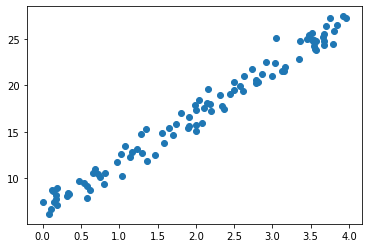

In [20]:
plt.scatter(X, y)
plt.show()

Коэффициенты линейной регрессии можно вычислить аналитически по формуле:
<p style="text-align: center;">$\hat{\beta} = (X^{T}X)^{-1} X^{T}Y$</p>  
Выполним это вычисление, будем считать его эталонным и сравнивать с ним градиентные методы.

In [21]:
# Найдём коэффициенты линейной регрессии, с помощью аналитического решения, приведённого выше

# Функция np.c_ соединяет два массива как две колонки
# Добавляем x0 = 1 для каждого примера. (Данная колонка будет отвечать за коэффициент 𝛽0)
X_b = np.c_[np.ones((100, 1)), X]
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [22]:
beta_best

array([[6.64758719],
       [5.10792872]])

In [92]:
batch_regressor = BatchGradientRegressor(learning_rate=0.1, epochs=100)
batch_regressor.fit(X_b, y)

In [93]:
batch_regressor.coeffs_

array([[6.61493002],
       [5.12027281]])

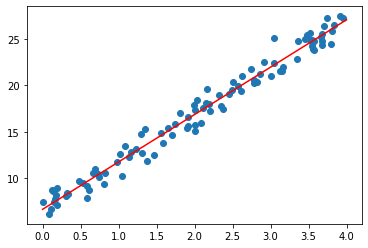

In [86]:
# Построим график восстановленной линейной регрессии
plt.scatter(X, y)

x = np.linspace(0.,4.)
plt.plot(x, batch_regressor.coeffs_[0] + x * batch_regressor.coeffs_[1], color='r')

plt.show()

In [95]:
# Вычислим предсказания
X_test = np.array([2, 3, 4]).T
y_pred = batch_regressor.predict(X_test)

y_pred

array([[16.85547565],
       [21.97574847],
       [27.09602128]])

In [46]:
# Обучение регрессии, с помощью библиотеки sklearn
'''from sklearn.linear_model import LinearRegression

X_new = np.array([[0], [2]])

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

y_pred = lin_reg.predict(X_new)
#print(y_pred)
'''

[6.88328114] [[5.01023548]]


### Ссылки

1. Оригинал аналитического решения:
https://stats.stackexchange.com/a/46171

2. Aurélien Géron. Hands-On Machine Learning with Scikit-Learn and TensorFlow, C. 150

3. https://arxiv.org/pdf/1309.0238v1.pdf
4. https://scikit-learn.org/dev/developers/develop.html